# Solar Power Forecasting

In [12]:
# ! mkdir ~/.kaggle

# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d anikannal/solar-power-generation-data
# !unzip /content/solar-power-generation-data.zip

In [13]:
##Importing all necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile
import warnings
warnings.filterwarnings('ignore')

# Plant Generation Data
df_gen = pd.read_csv('Plant_2_Generation_Data.csv')

# Plant Weather Data
df_weather = pd.read_csv('Plant_2_Weather_Sensor_Data.csv') 

In [14]:
df_gen.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [15]:
df_weather.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [16]:
#Dropping PLANT_ID 
df_gen.drop('PLANT_ID', axis=1, inplace=True)
df_weather.drop('PLANT_ID', axis = 1, inplace=True)

In [17]:
df_gen.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [18]:
df_weather.head()

,DATE_TIME,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [19]:
df_gen.shape, '**********', df_weather.shape

((67698, 6), '**********', (3259, 5))

In [20]:
print(df_gen.describe(),'\n')
print(df_weather.describe())

           DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count  67698.000000  67698.000000  67698.000000  6.769800e+04
mean     246.701961    241.277825   3294.890295  6.589448e+08
std      370.569597    362.112118   2919.448386  7.296678e+08
min        0.000000      0.000000      0.000000  0.000000e+00
25%        0.000000      0.000000    272.750000  1.996494e+07
50%        0.000000      0.000000   2911.000000  2.826276e+08
75%      446.591667    438.215000   5534.000000  1.348495e+09
max     1420.933333   1385.420000   9873.000000  2.247916e+09 

       AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count          3259.000000         3259.000000  3259.000000
mean             28.069400           32.772408     0.232737
std               4.061556           11.344034     0.312693
min              20.942385           20.265123     0.000000
25%              24.602135           23.716881     0.000000
50%              26.981263           27.534606     0.019040
75%              31.

In [21]:
print(df_gen.isnull().sum())
print('\n')
print(df_weather.isnull().sum())

DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64


DATE_TIME              0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


No missing values found in both dataframes

OBSERVATIONS:

1.Generation data for all inverters is not available for all the blocks. 

We need to include blocks where data for all inverters is present.

2.Weather data is fully present

In [22]:
## Mapping
Inverter_labels = {inverter_no:inverter_name for inverter_name,inverter_no in enumerate(df_gen['SOURCE_KEY'].unique(),1)}
df_gen['Inverter_No'] = df_gen['SOURCE_KEY'].map(Inverter_labels) 

In [23]:
Inverter_labels

{'4UPUqMRk7TRMgml': 1,
 '81aHJ1q11NBPMrL': 2,
 '9kRcWv60rDACzjR': 3,
 'Et9kgGMDl729KT4': 4,
 'IQ2d7wF4YD8zU1Q': 5,
 'LYwnQax7tkwH5Cb': 6,
 'LlT2YUhhzqhg5Sw': 7,
 'Mx2yZCDsyf6DPfv': 8,
 'NgDl19wMapZy17u': 9,
 'PeE6FRyGXUgsRhN': 10,
 'Qf4GUc1pJu5T6c6': 11,
 'Quc1TzYxW2pYoWX': 12,
 'V94E5Ben1TlhnDV': 13,
 'WcxssY2VbP4hApt': 14,
 'mqwcsP2rE7J0TFp': 15,
 'oZ35aAeoifZaQzV': 16,
 'oZZkBaNadn6DNKz': 17,
 'q49J1IKaHRwDQnt': 18,
 'rrq4fwE8jgrTyWY': 19,
 'vOuJvMaM2sgwLmb': 20,
 'xMbIugepa2P7lBB': 21,
 'xoJJ8DcxJEcupym': 22}

In [24]:
df_gen.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Inverter_No
0,2020-05-15 00:00:00,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,1
1,2020-05-15 00:00:00,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,2
2,2020-05-15 00:00:00,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,3
3,2020-05-15 00:00:00,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,4
4,2020-05-15 00:00:00,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,5


In [25]:
## Drop Source Key after replacing with inverter numbers
df_gen.drop('SOURCE_KEY',axis=1,inplace=True)
df_weather.drop('SOURCE_KEY',axis=1,inplace=True) 
#Reordering and dropping Daily yield and Total yield
df_gen = df_gen[['DATE_TIME','Inverter_No' ,'DC_POWER', 'AC_POWER']]

In [26]:
df_gen.head()

,DATE_TIME,Inverter_No,DC_POWER,AC_POWER
0,2020-05-15 00:00:00,1,0.0,0.0
1,2020-05-15 00:00:00,2,0.0,0.0
2,2020-05-15 00:00:00,3,0.0,0.0
3,2020-05-15 00:00:00,4,0.0,0.0
4,2020-05-15 00:00:00,5,0.0,0.0


In [27]:
df_gen.shape

(67698, 4)

In [28]:
df_gen.groupby('Inverter_No')['DATE_TIME'].count()

Inverter_No
1     3195
2     3259
3     3259
4     3195
5     2355
6     3259
7     3259
8     3195
9     2355
10    3259
11    3195
12    3195
13    3259
14    3259
15    2355
16    3195
17    3259
18    3259
19    3259
20    3259
21    2355
22    3259
Name: DATE_TIME, dtype: int64

In [29]:
print('Inverter {} has data for {} timestamps(Minimum)'.
      format(df_gen.groupby('Inverter_No')['DATE_TIME'].count().argmin()+1,df_gen.groupby('Inverter_No')['DATE_TIME'].count().min()))
print('Inverter {} has data for {} timestamps(Maximum)'.
      format(df_gen.groupby('Inverter_No')['DATE_TIME'].count().argmax()+1,df_gen.groupby('Inverter_No')['DATE_TIME'].count().max()))     
print('DIFFERENCE = {}'.format(df_gen.groupby('Inverter_No')['DATE_TIME'].count().max() - 
                               df_gen.groupby('Inverter_No')['DATE_TIME'].count().min()))

Inverter 5 has data for 2355 timestamps(Minimum)
Inverter 2 has data for 3259 timestamps(Maximum)
DIFFERENCE = 904


In [30]:
from functools import reduce

grouped = df_gen.groupby('Inverter_No')

## Making a list of each Inverter group 
dfs = list()
for i in df_gen['Inverter_No'].unique():
    dfs.append(grouped.get_group(i))
  

 ## Merging data inverterwise using 'reduce'
 ## Applying merge function to all of the list elements of 'dfs' in the sequence passed.

df_new = reduce(lambda left,right: pd.merge(left,right,on=['DATE_TIME'],how='outer'),dfs)

display(df_new)
#Rename columns
df_new.columns = ['DATE_TIME',
        'DC_POWER_1', 'AC_POWER_1',
        'Inverter_No_1', 'DC_POWER_2', 'AC_POWER_2',
        'Inverter_No_2', 'DC_POWER_3', 'AC_POWER_3',
        'Inverter_No_3', 'DC_POWER_4', 'AC_POWER_4',
        'Inverter_No_4', 'DC_POWER_5', 'AC_POWER_5',
        'Inverter_No_5', 'DC_POWER_6', 'AC_POWER_6',
        'Inverter_No_6', 'DC_POWER_7', 'AC_POWER_7',
        'Inverter_No_7', 'DC_POWER_8', 'AC_POWER_8',
        'Inverter_No_8', 'DC_POWER_9', 'AC_POWER_9',
        'Inverter_No_9', 'DC_POWER_10', 'AC_POWER_10',
        'Inverter_No_10', 'DC_POWER_11', 'AC_POWER_11',
        'Inverter_No_11', 'DC_POWER_12', 'AC_POWER_12',
        'Inverter_No_12', 'DC_POWER_13', 'AC_POWER_13',
        'Inverter_No_13', 'DC_POWER_14', 'AC_POWER_14',
        'Inverter_No_14', 'DC_POWER_15', 'AC_POWER_15',
        'Inverter_No_15', 'DC_POWER_16', 'AC_POWER_16',
        'Inverter_No_16', 'DC_POWER_17', 'AC_POWER_17',
        'Inverter_No_17', 'DC_POWER_18', 'AC_POWER_18',
        'Inverter_No_18', 'DC_POWER_19', 'AC_POWER_19',
        'Inverter_No_19', 'DC_POWER_20', 'AC_POWER_20',
        'Inverter_No_20', 'DC_POWER_21', 'AC_POWER_21',
        'Inverter_No_21', 'DC_POWER_22', 'AC_POWER_22',
        'Inverter_No_22']

,DATE_TIME,Inverter_No_x,DC_POWER_x,AC_POWER_x,Inverter_No_y,DC_POWER_y,AC_POWER_y,Inverter_No_x,DC_POWER_x,AC_POWER_x,...,AC_POWER_x,Inverter_No_y,DC_POWER_y,AC_POWER_y,Inverter_No_x,DC_POWER_x,AC_POWER_x,Inverter_No_y,DC_POWER_y,AC_POWER_y
0,2020-05-15 00:00:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.000000,20,0.000000,0.000000,21.0,0.0,0.0,22,0.0,0.0
1,2020-05-15 00:15:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.000000,20,0.000000,0.000000,21.0,0.0,0.0,22,0.0,0.0
2,2020-05-15 00:30:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.000000,20,0.000000,0.000000,21.0,0.0,0.0,22,0.0,0.0
3,2020-05-15 00:45:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.000000,20,0.000000,0.000000,21.0,0.0,0.0,22,0.0,0.0
4,2020-05-15 01:00:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.000000,20,0.000000,0.000000,21.0,0.0,0.0,22,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,2020-05-20 13:00:00,NaN,NaN,NaN,2,0.0,0.0,3,0.0,0.0,...,1179.653333,20,1299.906667,1267.406667,NaN,NaN,NaN,22,0.0,0.0
3255,2020-05-20 13:15:00,NaN,NaN,NaN,2,0.0,0.0,3,0.0,0.0,...,1173.713333,20,1286.700000,1254.526667,NaN,NaN,NaN,22,0.0,0.0
3256,2020-05-20 13:30:00,NaN,NaN,NaN,2,0.0,0.0,3,0.0,0.0,...,1116.450000,20,1224.671429,1194.050000,NaN,NaN,NaN,22,0.0,0.0
3257,2020-05-20 13:45:00,NaN,NaN,NaN,2,0.0,0.0,3,0.0,0.0,...,1095.706667,20,1200.953333,1170.946667,NaN,NaN,NaN,22,0.0,0.0


In [31]:
df_new.head()

,DATE_TIME,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,AC_POWER_2,Inverter_No_2,DC_POWER_3,AC_POWER_3,Inverter_No_3,...,Inverter_No_19,DC_POWER_20,AC_POWER_20,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22
0,2020-05-15 00:00:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
1,2020-05-15 00:15:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
2,2020-05-15 00:30:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3,2020-05-15 00:45:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
4,2020-05-15 01:00:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0


In [32]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   AMBIENT_TEMPERATURE  3259 non-null   float64
 2   MODULE_TEMPERATURE   3259 non-null   float64
 3   IRRADIATION          3259 non-null   float64
dtypes: float64(3), object(1)
memory usage: 102.0+ KB


In [33]:
df_weather['DATE_TIME'] = df_weather['DATE_TIME'].astype(str)
df_new['DATE_TIME'] = df_new['DATE_TIME'].astype(str)

In [34]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   AMBIENT_TEMPERATURE  3259 non-null   float64
 2   MODULE_TEMPERATURE   3259 non-null   float64
 3   IRRADIATION          3259 non-null   float64
dtypes: float64(3), object(1)
memory usage: 102.0+ KB


In [35]:
#Merging Generation & Weather datasets
df = df_weather.merge(df_new,left_on='DATE_TIME',right_on='DATE_TIME',how='outer')
df.head(1)

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,AC_POWER_2,Inverter_No_2,...,Inverter_No_19,DC_POWER_20,AC_POWER_20,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22
0,2020-05-15 00:00:00,27.004764,25.060789,0.0,1.0,0.0,0.0,2,0.0,0.0,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0


In [36]:
df.tail(1)

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,AC_POWER_2,Inverter_No_2,...,Inverter_No_19,DC_POWER_20,AC_POWER_20,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22
3258,2020-06-17 23:45:00,23.202871,22.535908,0.0,1.0,0.0,0.0,2,0.0,0.0,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0


In [37]:
#Generating 15 min time blocks
tb = pd.date_range('15-05-2020','16-05-2020',freq='15min')
tb=tb[:-1] 
tb

DatetimeIndex(['2020-05-15 00:00:00', '2020-05-15 00:15:00',
               '2020-05-15 00:30:00', '2020-05-15 00:45:00',
               '2020-05-15 01:00:00', '2020-05-15 01:15:00',
               '2020-05-15 01:30:00', '2020-05-15 01:45:00',
               '2020-05-15 02:00:00', '2020-05-15 02:15:00',
               '2020-05-15 02:30:00', '2020-05-15 02:45:00',
               '2020-05-15 03:00:00', '2020-05-15 03:15:00',
               '2020-05-15 03:30:00', '2020-05-15 03:45:00',
               '2020-05-15 04:00:00', '2020-05-15 04:15:00',
               '2020-05-15 04:30:00', '2020-05-15 04:45:00',
               '2020-05-15 05:00:00', '2020-05-15 05:15:00',
               '2020-05-15 05:30:00', '2020-05-15 05:45:00',
               '2020-05-15 06:00:00', '2020-05-15 06:15:00',
               '2020-05-15 06:30:00', '2020-05-15 06:45:00',
               '2020-05-15 07:00:00', '2020-05-15 07:15:00',
               '2020-05-15 07:30:00', '2020-05-15 07:45:00',
               '2020-05-

In [38]:
ts = tb.strftime('%H:%M')
ts

Index(['00:00', '00:15', '00:30', '00:45', '01:00', '01:15', '01:30', '01:45',
       '02:00', '02:15', '02:30', '02:45', '03:00', '03:15', '03:30', '03:45',
       '04:00', '04:15', '04:30', '04:45', '05:00', '05:15', '05:30', '05:45',
       '06:00', '06:15', '06:30', '06:45', '07:00', '07:15', '07:30', '07:45',
       '08:00', '08:15', '08:30', '08:45', '09:00', '09:15', '09:30', '09:45',
       '10:00', '10:15', '10:30', '10:45', '11:00', '11:15', '11:30', '11:45',
       '12:00', '12:15', '12:30', '12:45', '13:00', '13:15', '13:30', '13:45',
       '14:00', '14:15', '14:30', '14:45', '15:00', '15:15', '15:30', '15:45',
       '16:00', '16:15', '16:30', '16:45', '17:00', '17:15', '17:30', '17:45',
       '18:00', '18:15', '18:30', '18:45', '19:00', '19:15', '19:30', '19:45',
       '20:00', '20:15', '20:30', '20:45', '21:00', '21:15', '21:30', '21:45',
       '22:00', '22:15', '22:30', '22:45', '23:00', '23:15', '23:30', '23:45'],
      dtype='object')

In [39]:
block_dict = {}
j=1
for i in range(len(ts)):
    block_dict[ts[i]] =  j
    j+=1
block_dict

{'00:00': 1,
 '00:15': 2,
 '00:30': 3,
 '00:45': 4,
 '01:00': 5,
 '01:15': 6,
 '01:30': 7,
 '01:45': 8,
 '02:00': 9,
 '02:15': 10,
 '02:30': 11,
 '02:45': 12,
 '03:00': 13,
 '03:15': 14,
 '03:30': 15,
 '03:45': 16,
 '04:00': 17,
 '04:15': 18,
 '04:30': 19,
 '04:45': 20,
 '05:00': 21,
 '05:15': 22,
 '05:30': 23,
 '05:45': 24,
 '06:00': 25,
 '06:15': 26,
 '06:30': 27,
 '06:45': 28,
 '07:00': 29,
 '07:15': 30,
 '07:30': 31,
 '07:45': 32,
 '08:00': 33,
 '08:15': 34,
 '08:30': 35,
 '08:45': 36,
 '09:00': 37,
 '09:15': 38,
 '09:30': 39,
 '09:45': 40,
 '10:00': 41,
 '10:15': 42,
 '10:30': 43,
 '10:45': 44,
 '11:00': 45,
 '11:15': 46,
 '11:30': 47,
 '11:45': 48,
 '12:00': 49,
 '12:15': 50,
 '12:30': 51,
 '12:45': 52,
 '13:00': 53,
 '13:15': 54,
 '13:30': 55,
 '13:45': 56,
 '14:00': 57,
 '14:15': 58,
 '14:30': 59,
 '14:45': 60,
 '15:00': 61,
 '15:15': 62,
 '15:30': 63,
 '15:45': 64,
 '16:00': 65,
 '16:15': 66,
 '16:30': 67,
 '16:45': 68,
 '17:00': 69,
 '17:15': 70,
 '17:30': 71,
 '17:45': 72,
 

In [40]:
df['DATE_TIME'].apply(lambda x:str(x)[-8:-3])

0       00:00
1       00:15
2       00:30
3       00:45
4       01:00
        ...  
3254    22:45
3255    23:00
3256    23:15
3257    23:30
3258    23:45
Name: DATE_TIME, Length: 3259, dtype: object

In [41]:
# Making new columns of Time,BLOCK and Date and droping DATE_TIME column
df['TIME'] = df['DATE_TIME'].apply(lambda x:str(x)[-8:-3])
df['DATE'] = pd.to_datetime(df['DATE_TIME']).dt.date
df.head()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,AC_POWER_2,Inverter_No_2,...,AC_POWER_20,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22,TIME,DATE
0,2020-05-15 00:00:00,27.004764,25.060789,0.0,1.0,0.0,0.0,2,0.0,0.0,...,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0,00:00,2020-05-15
1,2020-05-15 00:15:00,26.880811,24.421869,0.0,1.0,0.0,0.0,2,0.0,0.0,...,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0,00:15,2020-05-15
2,2020-05-15 00:30:00,26.682055,24.427290,0.0,1.0,0.0,0.0,2,0.0,0.0,...,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0,00:30,2020-05-15
3,2020-05-15 00:45:00,26.500589,24.420678,0.0,1.0,0.0,0.0,2,0.0,0.0,...,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0,00:45,2020-05-15
4,2020-05-15 01:00:00,26.596148,25.088210,0.0,1.0,0.0,0.0,2,0.0,0.0,...,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0,01:00,2020-05-15


In [42]:
pd.to_datetime(df['TIME'])[-8:-3]

3251   2021-11-14 22:00:00
3252   2021-11-14 22:15:00
3253   2021-11-14 22:30:00
3254   2021-11-14 22:45:00
3255   2021-11-14 23:00:00
Name: TIME, dtype: datetime64[ns]

In [43]:

df['BLOCK'] = pd.to_datetime(df['TIME']).astype(str).apply(lambda x:block_dict[str(x)[-8:-3]])
df.drop('DATE_TIME',axis=1,inplace=True)
#Saving the dictionary using numpy
np.save('timestamp_block_dictionary.npy',block_dict)
df.head()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,AC_POWER_2,Inverter_No_2,DC_POWER_3,...,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22,TIME,DATE,BLOCK
0,27.004764,25.060789,0.0,1.0,0.0,0.0,2,0.0,0.0,3,...,0.0,21.0,0.0,0.0,22,0.0,0.0,00:00,2020-05-15,1
1,26.880811,24.421869,0.0,1.0,0.0,0.0,2,0.0,0.0,3,...,0.0,21.0,0.0,0.0,22,0.0,0.0,00:15,2020-05-15,2
2,26.682055,24.427290,0.0,1.0,0.0,0.0,2,0.0,0.0,3,...,0.0,21.0,0.0,0.0,22,0.0,0.0,00:30,2020-05-15,3
3,26.500589,24.420678,0.0,1.0,0.0,0.0,2,0.0,0.0,3,...,0.0,21.0,0.0,0.0,22,0.0,0.0,00:45,2020-05-15,4
4,26.596148,25.088210,0.0,1.0,0.0,0.0,2,0.0,0.0,3,...,0.0,21.0,0.0,0.0,22,0.0,0.0,01:00,2020-05-15,5


In [44]:
df['BLOCK']

0        1
1        2
2        3
3        4
4        5
        ..
3254    92
3255    93
3256    94
3257    95
3258    96
Name: BLOCK, Length: 3259, dtype: int64

In [45]:
## Column re-ordering
cols = df.columns.tolist()
df = df[[cols[-1]]+[cols[-2]]+[cols[-3]]+cols[:-3]]
display(df)

,BLOCK,DATE,TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,...,Inverter_No_19,DC_POWER_20,AC_POWER_20,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22
0,1,2020-05-15,00:00,27.004764,25.060789,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
1,2,2020-05-15,00:15,26.880811,24.421869,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
2,3,2020-05-15,00:30,26.682055,24.427290,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3,4,2020-05-15,00:45,26.500589,24.420678,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
4,5,2020-05-15,01:00,26.596148,25.088210,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,92,2020-06-17,22:45,23.511703,22.856201,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3255,93,2020-06-17,23:00,23.482282,22.744190,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3256,94,2020-06-17,23:15,23.354743,22.492245,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3257,95,2020-06-17,23:30,23.291048,22.373909,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0


In [46]:
df.tail(20)

,BLOCK,DATE,TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,...,Inverter_No_19,DC_POWER_20,AC_POWER_20,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22
3239,77,2020-06-17,19:00,23.547952,22.599791,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3240,78,2020-06-17,19:15,23.472574,22.464956,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3241,79,2020-06-17,19:30,23.497328,22.438098,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3242,80,2020-06-17,19:45,23.602745,22.418766,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3243,81,2020-06-17,20:00,23.665128,22.367719,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3244,82,2020-06-17,20:15,23.601209,22.245943,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3245,83,2020-06-17,20:30,23.687547,22.377655,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3246,84,2020-06-17,20:45,23.750455,22.825295,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3247,85,2020-06-17,21:00,23.752441,23.187267,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3248,86,2020-06-17,21:15,23.811611,23.471660,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0


In [47]:
df.shape

(3259, 72)

In [48]:
last_3_days = df['DATE'].astype(str).unique()[-3:]
df[df['DATE'].astype(str).isin(last_3_days)].sort_values(by=['DATE','BLOCK'])

,BLOCK,DATE,TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,...,Inverter_No_19,DC_POWER_20,AC_POWER_20,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22
2971,1,2020-06-15,00:00,24.486876,23.846251,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
2972,2,2020-06-15,00:15,24.509378,23.902851,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
2973,3,2020-06-15,00:30,24.605338,24.172737,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
2974,4,2020-06-15,00:45,24.679791,24.459142,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
2975,5,2020-06-15,01:00,24.636373,24.380419,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,92,2020-06-17,22:45,23.511703,22.856201,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3255,93,2020-06-17,23:00,23.482282,22.744190,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3256,94,2020-06-17,23:15,23.354743,22.492245,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3257,95,2020-06-17,23:30,23.291048,22.373909,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0


# Time based Train Test split

In [49]:
#Getting last 3 days data 
last_3_days = df['DATE'].astype(str).unique()[-3:]
df_test = df[df['DATE'].astype(str).isin(last_3_days)].sort_values(by=['DATE','BLOCK'])
#Saving Test data
df_test.reset_index(drop=True).to_csv('Test_data.csv')

In [50]:
#Saving all as Train for indexes not present in test data
df_train = df[~df.index.isin(df_test.index)]
df_train.to_csv('Train_data.csv')

## Checking shapes
print('Train:',df_train.shape)
print('Test:',df_test.shape)

## Check for missing values
print('No. of missing values in train dataset: ',list(df_train.isnull().sum())) 

Train: (2971, 72)
Test: (288, 72)
No. of missing values in train dataset:  [0, 0, 0, 0, 0, 0, 64, 64, 64, 0, 0, 0, 0, 0, 0, 64, 64, 64, 904, 904, 904, 0, 0, 0, 0, 0, 0, 64, 64, 64, 904, 904, 904, 0, 0, 0, 64, 64, 64, 64, 64, 64, 0, 0, 0, 0, 0, 0, 904, 904, 904, 64, 64, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 904, 904, 904, 0, 0, 0]


In [51]:
df_train

,BLOCK,DATE,TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,...,Inverter_No_19,DC_POWER_20,AC_POWER_20,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22
0,1,2020-05-15,00:00,27.004764,25.060789,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
1,2,2020-05-15,00:15,26.880811,24.421869,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
2,3,2020-05-15,00:30,26.682055,24.427290,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3,4,2020-05-15,00:45,26.500589,24.420678,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
4,5,2020-05-15,01:00,26.596148,25.088210,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,92,2020-06-14,22:45,24.185657,22.922953,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
2967,93,2020-06-14,23:00,24.412542,23.356136,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
2968,94,2020-06-14,23:15,24.652915,23.913763,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
2969,95,2020-06-14,23:30,24.702391,24.185130,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0


In [52]:
df_test

,BLOCK,DATE,TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,...,Inverter_No_19,DC_POWER_20,AC_POWER_20,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22
2971,1,2020-06-15,00:00,24.486876,23.846251,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
2972,2,2020-06-15,00:15,24.509378,23.902851,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
2973,3,2020-06-15,00:30,24.605338,24.172737,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
2974,4,2020-06-15,00:45,24.679791,24.459142,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
2975,5,2020-06-15,01:00,24.636373,24.380419,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,92,2020-06-17,22:45,23.511703,22.856201,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3255,93,2020-06-17,23:00,23.482282,22.744190,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3256,94,2020-06-17,23:15,23.354743,22.492245,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3257,95,2020-06-17,23:30,23.291048,22.373909,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0


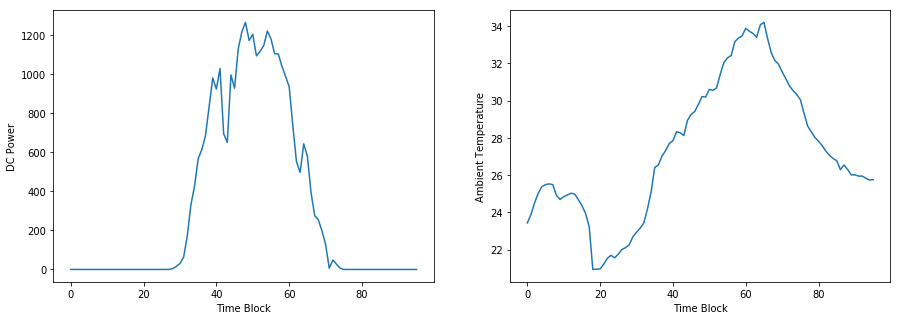

In [55]:
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.plot(df_train[df_train['DATE'].astype(str)=='2020-05-18'].reset_index(drop=True)['AC_POWER_1'])
ax2.plot(df_train[df_train['DATE'].astype(str)=='2020-05-18'].reset_index(drop=True)['AMBIENT_TEMPERATURE'])
ax1.set_xlabel('Time Block')
ax1.set_ylabel('DC Power')

ax2.set_xlabel('Time Block')
ax2.set_ylabel('Ambient Temperature')

plt.show()

In [56]:
df2 = df_gen.copy() # Making a acopy 
df2['DATE'] = pd.to_datetime(df_gen['DATE_TIME']).dt.date.astype(str)
df2[(df2['Inverter_No']==1)&(df2['DATE']=='2020-05-15')&(df2['AC_POWER']==0)].index

Int64Index([   0,   22,   44,   66,   88,  110,  132,  154,  176,  198,  220,
             242,  264,  286,  308,  330,  352,  374,  396,  418,  440,  462,
             484,  506,  902,  924,  946,  968,  990, 1012, 1034, 1056, 1078,
            1100, 1166, 1188, 1210, 1232, 1254, 1276, 1298, 1650, 1672, 1694,
            1716, 1738, 1760, 1782, 1804, 1826, 1848, 1870, 1892, 1914, 1936,
            1958, 1980, 2002, 2024, 2046, 2068],
           dtype='int64')

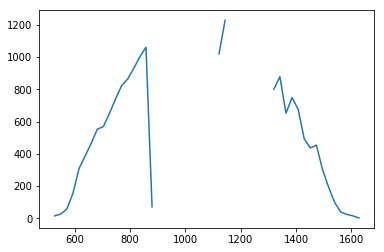

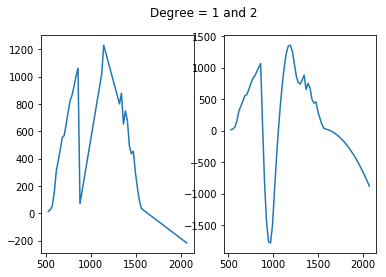

In [57]:
#Code for Plot 1
df2 = df_gen.copy() # Making a copy 
df2['DATE'] = pd.to_datetime(df_gen['DATE_TIME']).dt.date.astype(str)
## Selecting a date and replacing AC Power with NaN wherever its 0 and plotting 
indexes = df2[(df2['Inverter_No']==1)&(df2['DATE']=='2020-05-15')&(df2['AC_POWER']==0)].index
df2.loc[indexes,'AC_POWER']=np.nan
df2 = df2[(df2['Inverter_No']==1)&(df2['DATE']=='2020-05-15')]['AC_POWER']
df2.plot();

#Code for Plot 2
## Comparison between 1 & 2 degree splines
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Degree = 1 and 2')
ax1.plot(df2.interpolate(method='spline',order=1))
ax2.plot(df2.interpolate(method='spline',order=2))

In [58]:
df.head(24)

,BLOCK,DATE,TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,...,Inverter_No_19,DC_POWER_20,AC_POWER_20,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22
0,1,2020-05-15,00:00,27.004764,25.060789,0.000000,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
1,2,2020-05-15,00:15,26.880811,24.421869,0.000000,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
2,3,2020-05-15,00:30,26.682055,24.427290,0.000000,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3,4,2020-05-15,00:45,26.500589,24.420678,0.000000,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
4,5,2020-05-15,01:00,26.596148,25.088210,0.000000,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
5,6,2020-05-15,01:15,26.512740,25.317970,0.000000,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
6,7,2020-05-15,01:30,26.494339,25.217193,0.000000,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
7,8,2020-05-15,01:45,26.420410,25.065062,0.000000,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
8,9,2020-05-15,02:00,26.401946,24.691469,0.000000,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
9,10,2020-05-15,02:15,26.226078,24.559481,0.000000,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0


In [59]:
day_only_columns=list()
#Will collect all names like DC_POWER_1, DC_POWER_2 and so on 
DC_cols = [i for i in df.columns if 'DC_POWER' in i]
AC_cols = [i for i in df.columns if 'AC_POWER' in i]
day_only_columns = DC_cols+AC_cols+["IRRADIATION"]

day_only_columns

['DC_POWER_1',
 'DC_POWER_2',
 'DC_POWER_3',
 'DC_POWER_4',
 'DC_POWER_5',
 'DC_POWER_6',
 'DC_POWER_7',
 'DC_POWER_8',
 'DC_POWER_9',
 'DC_POWER_10',
 'DC_POWER_11',
 'DC_POWER_12',
 'DC_POWER_13',
 'DC_POWER_14',
 'DC_POWER_15',
 'DC_POWER_16',
 'DC_POWER_17',
 'DC_POWER_18',
 'DC_POWER_19',
 'DC_POWER_20',
 'DC_POWER_21',
 'DC_POWER_22',
 'AC_POWER_1',
 'AC_POWER_2',
 'AC_POWER_3',
 'AC_POWER_4',
 'AC_POWER_5',
 'AC_POWER_6',
 'AC_POWER_7',
 'AC_POWER_8',
 'AC_POWER_9',
 'AC_POWER_10',
 'AC_POWER_11',
 'AC_POWER_12',
 'AC_POWER_13',
 'AC_POWER_14',
 'AC_POWER_15',
 'AC_POWER_16',
 'AC_POWER_17',
 'AC_POWER_18',
 'AC_POWER_19',
 'AC_POWER_20',
 'AC_POWER_21',
 'AC_POWER_22',
 'IRRADIATION']

# Imputation

In [60]:
def Data_Preparation_Plant_Level(df):
    for col in day_only_columns:
        df[col] = df[col].astype(float)
        # For time except for non-generating hours(12 am to 6 am & 6 pm to 12 am) will be replaced by zero
        df.loc[df[(~((df['BLOCK']>24) & (df['BLOCK']<73))) & df[col].isnull()].index,col] = 0

    # Left NaN value for generating hours(6 am to 6pm) 
       
        #1.AC & DC columns
    df[DC_cols+AC_cols].interpolate(method='polynomial',order = 2,inplace=True)
       #2.Left NaN values in Irradiation, Ambient Temp, Module Temp, Inverter_No
    df.interpolate(method='linear',inplace=True)
    
    # Summing up Inverter wise AC and DC values to reach Plant-level generation
    df['AC_POWER'] = df.loc[: ,AC_cols].sum(axis=1)
    df['DC_POWER'] = df.loc[:,DC_cols].sum(axis=1)
    #Scaling generation to MW from kW  
    df['AC_POWER'] = df['AC_POWER']/1000
    df['DC_POWER'] = df['DC_POWER']/1000
    
    return df
#Applying the function on Train & Test 
df_train = Data_Preparation_Plant_Level(df_train)
df_test = Data_Preparation_Plant_Level(df_test)

In [61]:
## Checking shapes
print('Train:',df_train.shape)
print('Test:',df_test.shape)

Train: (2971, 74)
Test: (288, 74)


In [62]:
df_train.head()

,BLOCK,DATE,TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,...,AC_POWER_20,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22,AC_POWER,DC_POWER
0,1,2020-05-15,00:00,27.004764,25.060789,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,0.253
1,2,2020-05-15,00:15,26.880811,24.421869,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,0.253
2,3,2020-05-15,00:30,26.682055,24.427290,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,0.253
3,4,2020-05-15,00:45,26.500589,24.420678,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,0.253
4,5,2020-05-15,01:00,26.596148,25.088210,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,0.253


# Exploratory Data Analysis

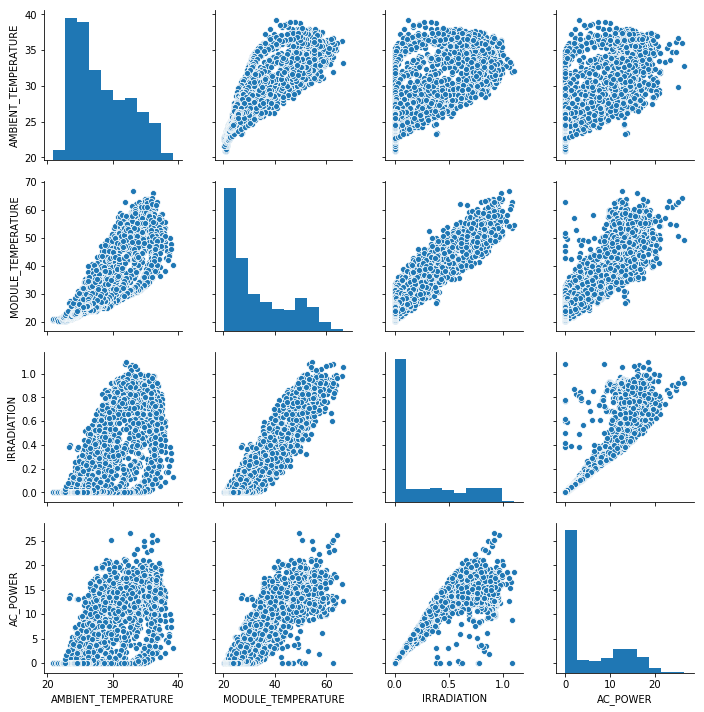

In [63]:
import seaborn as sns
sns.pairplot(df_train[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION','AC_POWER']],height=2.5)

Observations:

1.There seems to be high variation in Module Temperature with each degree rise in Ambient temperature

2.There are not much outliers

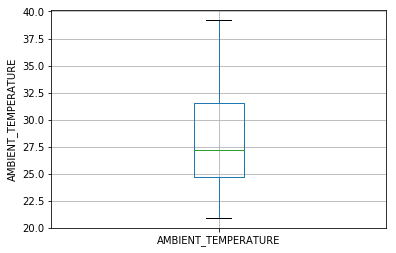

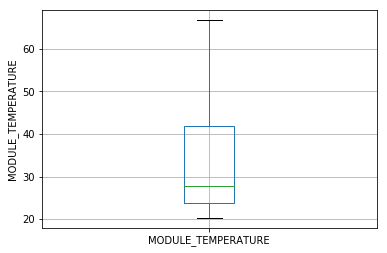

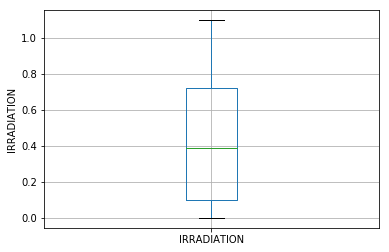

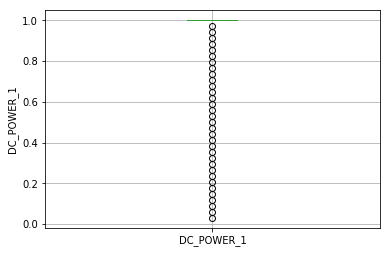

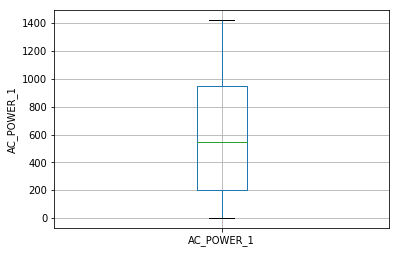

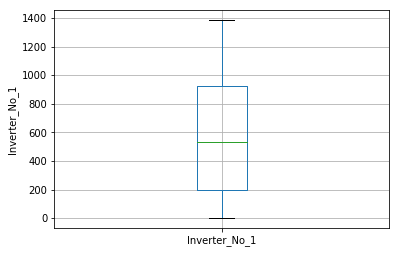

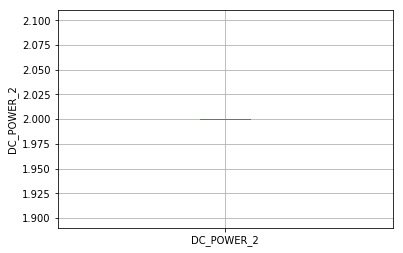

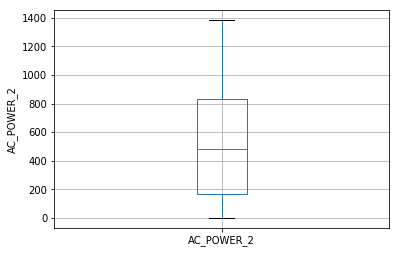

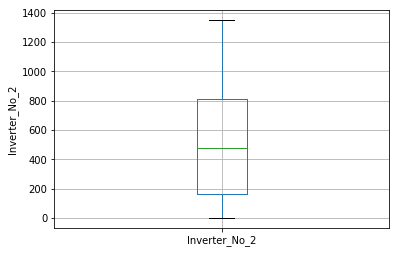

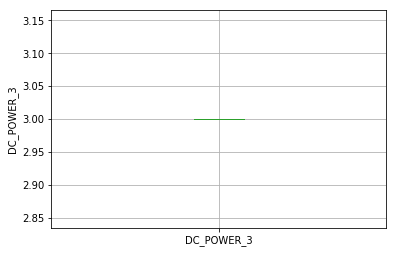

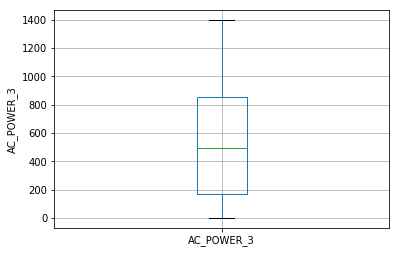

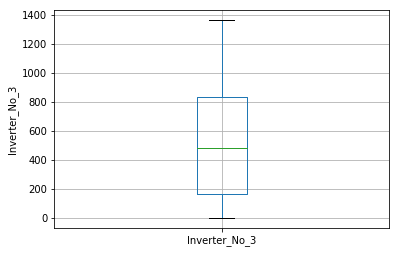

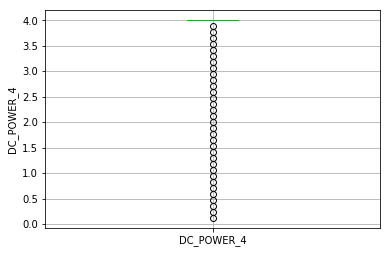

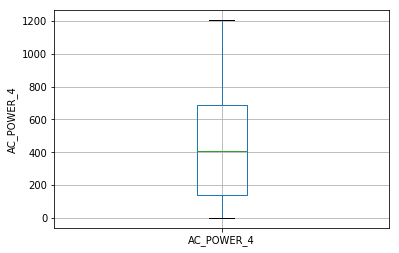

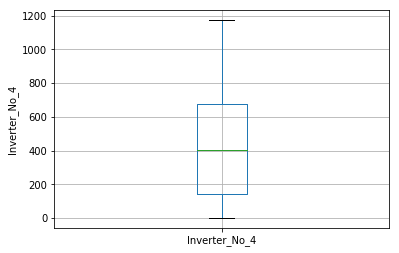

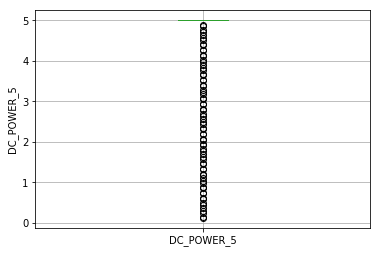

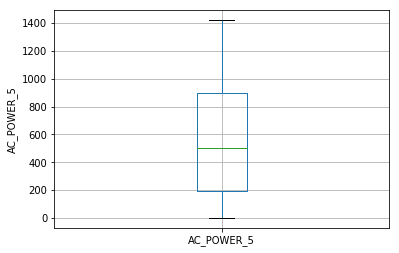

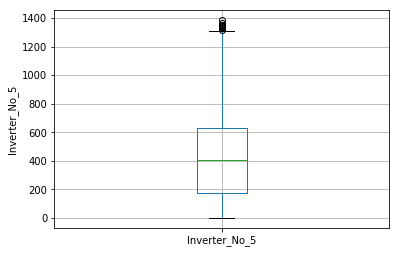

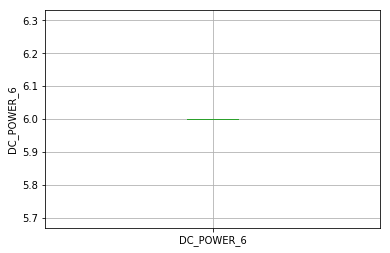

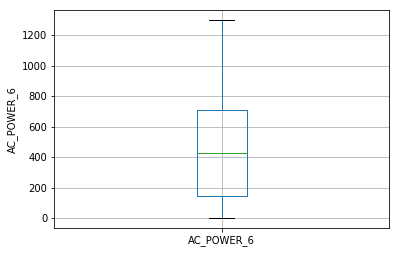

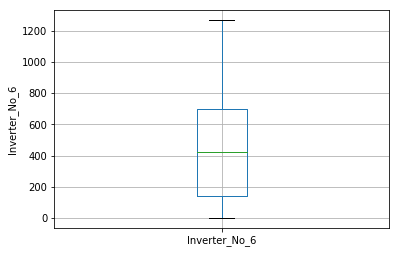

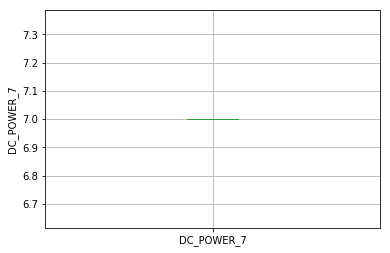

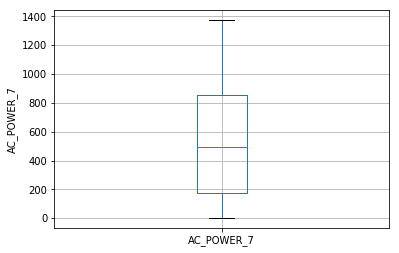

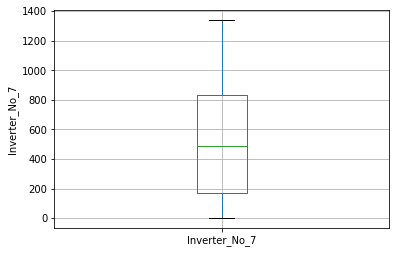

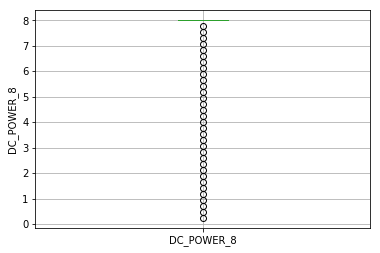

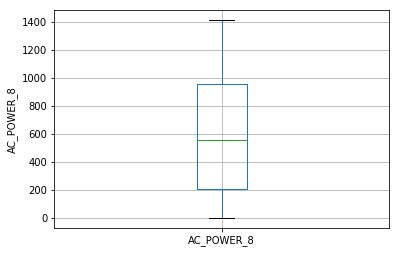

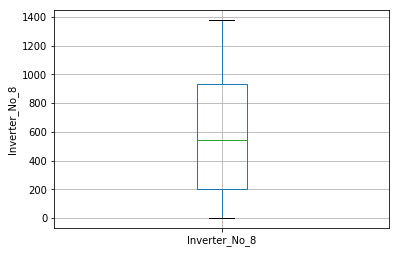

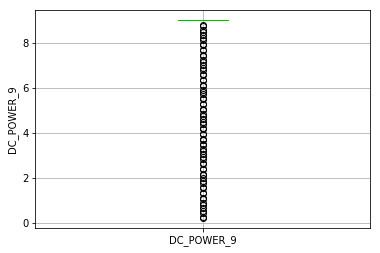

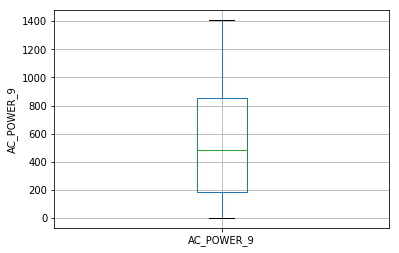

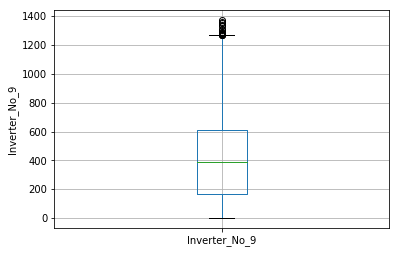

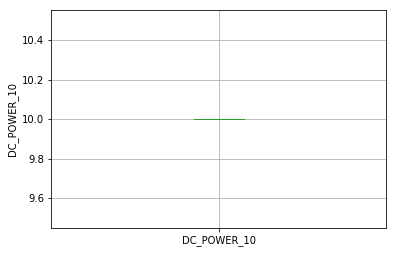

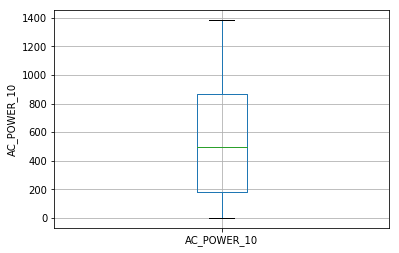

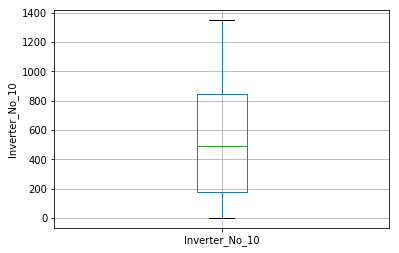

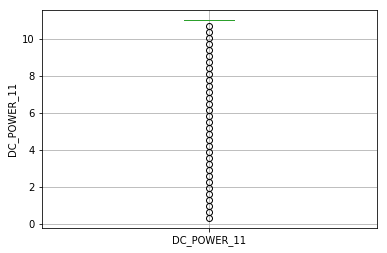

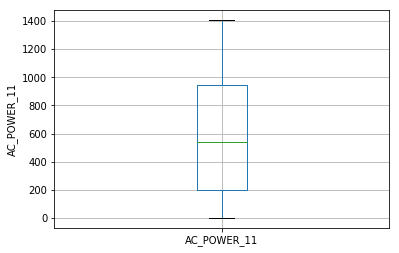

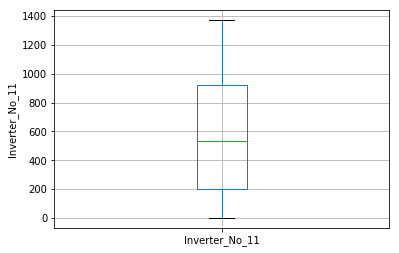

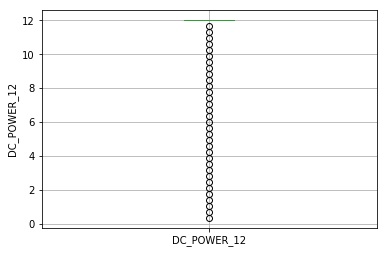

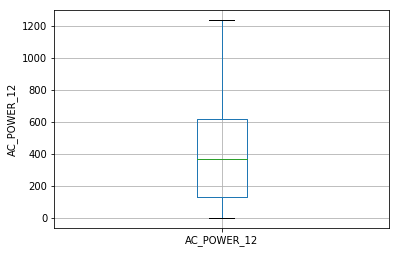

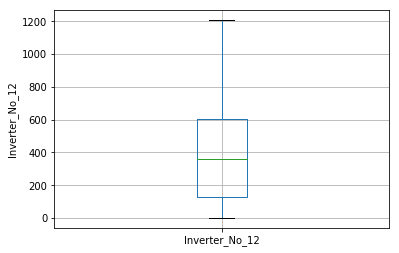

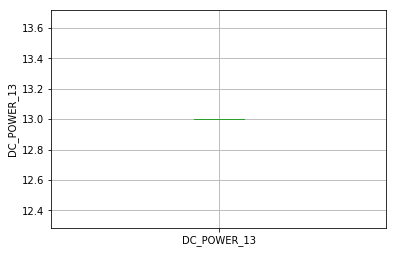

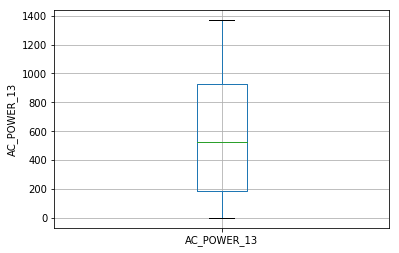

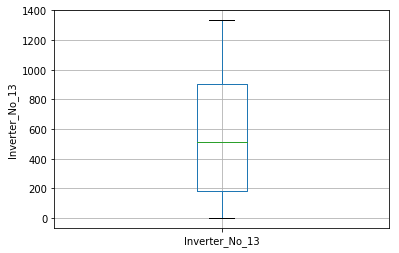

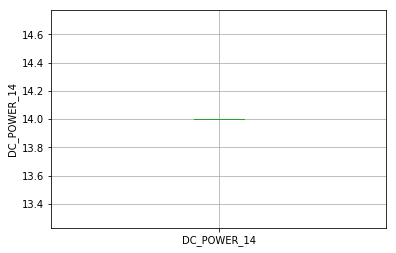

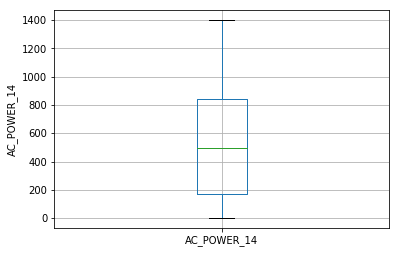

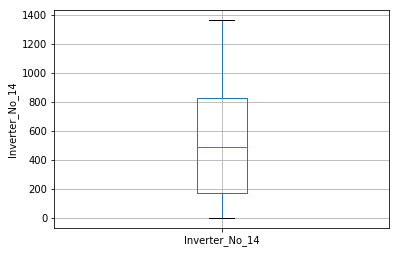

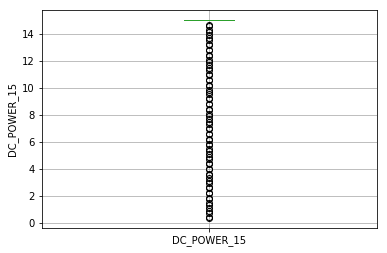

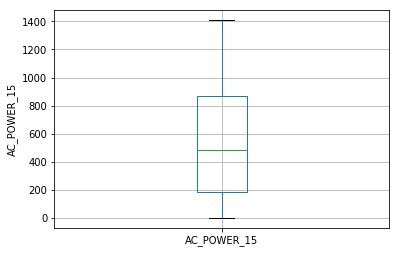

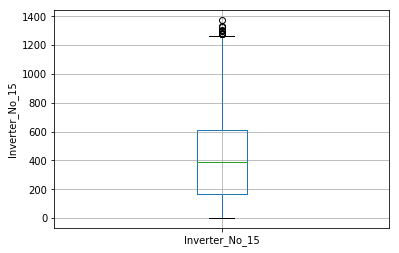

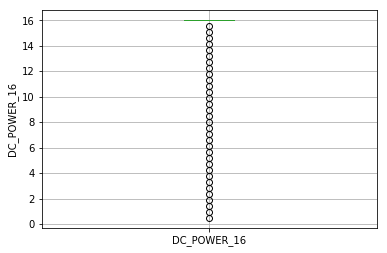

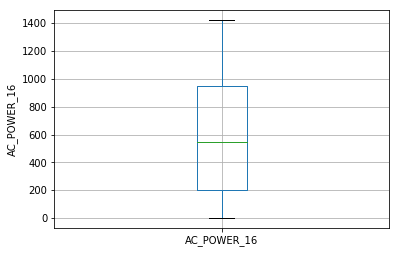

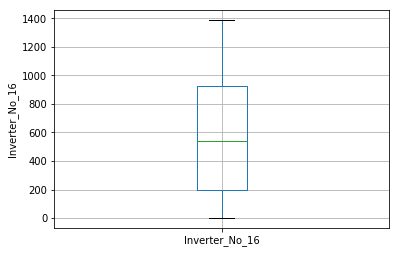

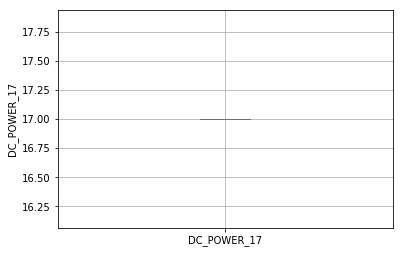

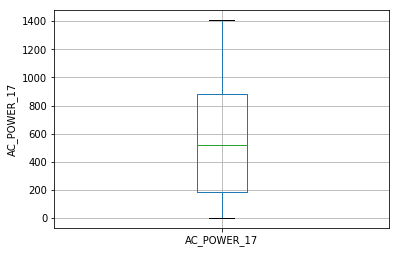

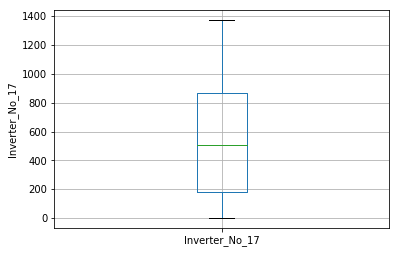

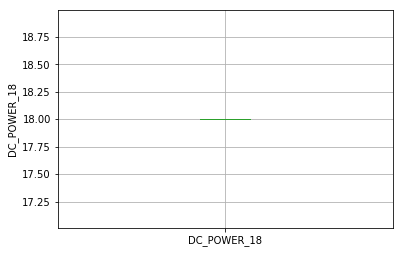

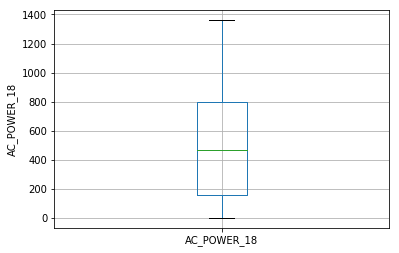

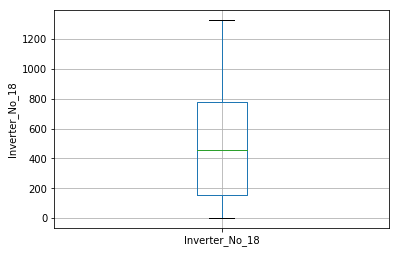

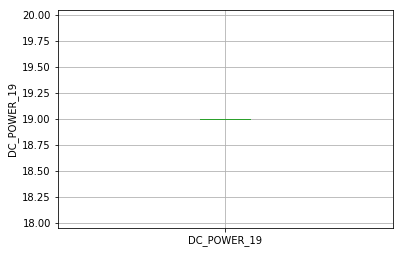

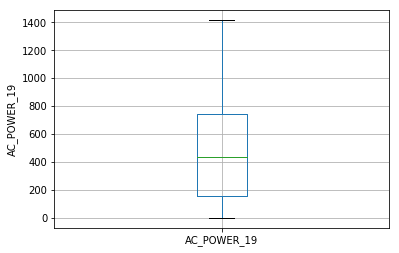

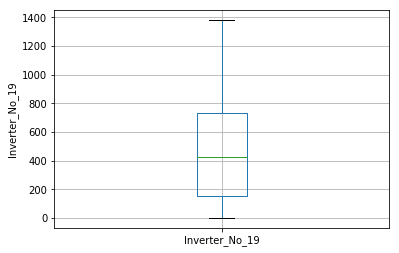

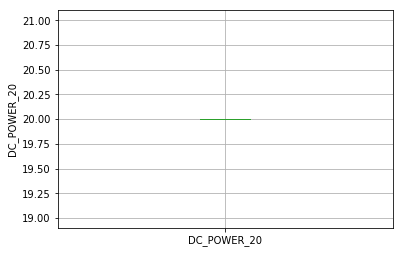

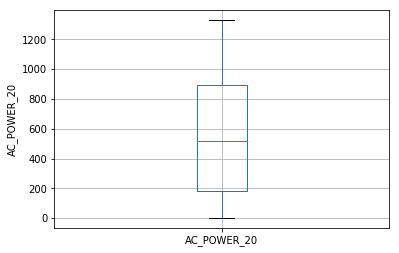

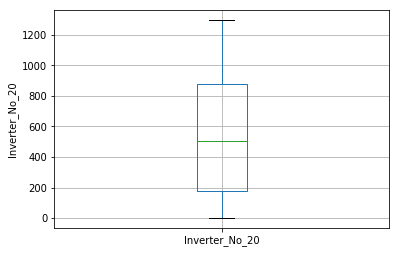

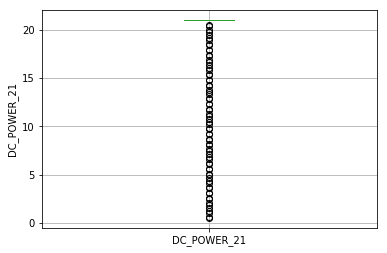

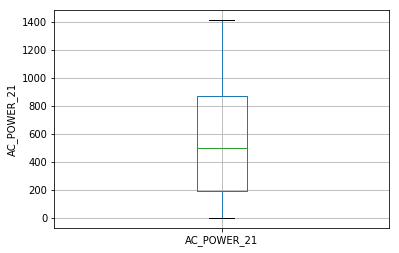

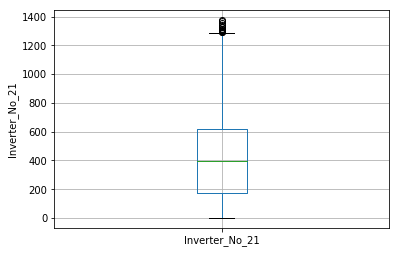

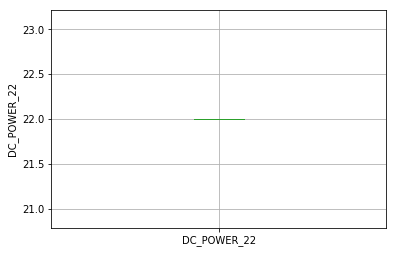

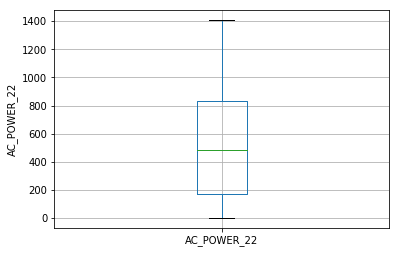

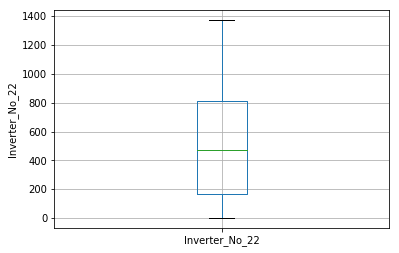

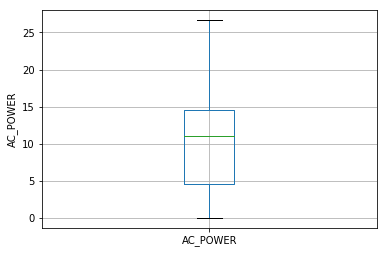

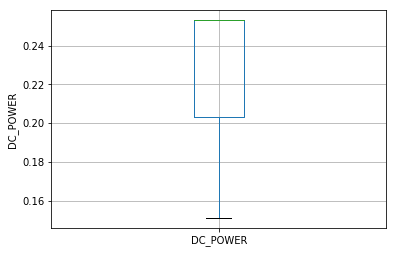

In [64]:
for feature in df_train.columns[3:]:
    # ignoring zero values for plotting
    df_train[df_train[feature]!=0].boxplot(column=feature)
    plt.ylabel(feature)
    plt.show()

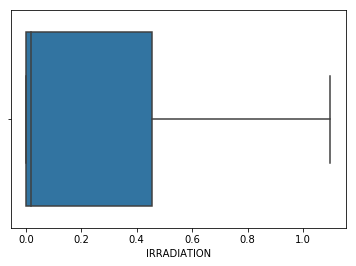

In [66]:
sns.boxplot(data=df_train,x='IRRADIATION')

# Finding Correlation

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,AC_POWER_2,Inverter_No_2,DC_POWER_3,...,AC_POWER_20,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22,AC_POWER,DC_POWER
AMBIENT_TEMPERATURE,1.000000,0.842631,0.660469,0.108704,0.588689,0.577037,NaN,0.482133,0.482228,NaN,...,0.552329,0.552438,-0.224663,0.424587,0.536219,NaN,0.534155,0.534207,0.652054,-0.180352
MODULE_TEMPERATURE,0.842631,1.000000,0.947146,0.072692,0.827335,0.819616,NaN,0.671758,0.671674,NaN,...,0.739794,0.739737,-0.127817,0.633127,0.703032,NaN,0.713459,0.713336,0.885174,-0.099883
IRRADIATION,0.660469,0.947146,1.000000,0.034885,0.853650,0.850426,NaN,0.716132,0.715961,NaN,...,0.795831,0.795679,-0.067729,0.692068,0.736888,NaN,0.736880,0.736718,0.923922,-0.053839
DC_POWER_1,0.108704,0.072692,0.034885,1.000000,0.050300,-0.049536,NaN,0.046002,0.045998,NaN,...,0.015723,0.015784,0.177898,0.028878,-0.050252,NaN,0.064239,0.064252,0.050693,0.415595
AC_POWER_1,0.588689,0.827335,0.853650,0.050300,1.000000,0.993699,NaN,0.654763,0.654917,NaN,...,0.697016,0.697240,-0.065107,0.603409,0.632809,NaN,0.660772,0.660955,0.867843,-0.047544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DC_POWER_22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC_POWER_22,0.534155,0.713459,0.736880,0.064239,0.660772,0.653570,NaN,0.757026,0.757250,NaN,...,0.683544,0.683995,-0.042852,0.538785,0.573738,NaN,1.000000,0.999993,0.802948,-0.023474
Inverter_No_22,0.534207,0.713336,0.736718,0.064252,0.660955,0.653758,NaN,0.757285,0.757514,NaN,...,0.683849,0.684305,-0.042613,0.539004,0.573833,NaN,0.999993,1.000000,0.803318,-0.023249
AC_POWER,0.652054,0.885174,0.923922,0.050693,0.867843,0.862990,NaN,0.789081,0.789427,NaN,...,0.846140,0.846525,0.018735,0.769131,0.782234,NaN,0.802948,0.803318,1.000000,0.030049


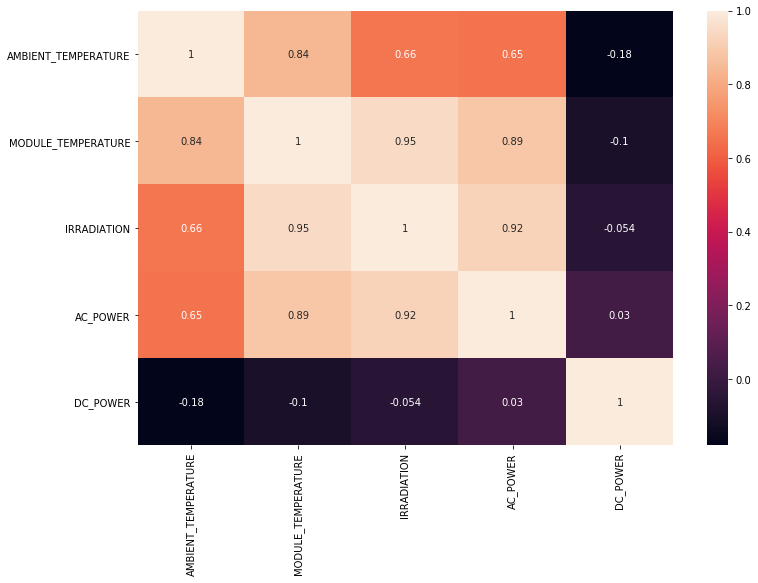

In [65]:
display(df_train.iloc[:,1:].corr())
plt.figure(figsize = (12,8))
sns.heatmap(df_train[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'AC_POWER', 'DC_POWER']].corr(),annot=True)

In [67]:
df_test.drop(columns=['DC_POWER'],axis=1,inplace=True)

# Outlier Detection

In [68]:
df_train.drop('DC_POWER',axis=1,inplace=True)
percentile_dict = {}
for i in df_train.columns[3:]:
    a_list = []
    for j in [1,10,25,50,75,90,99,100]:
        a_list.append(round(np.percentile(df_train[i],j),2))
    percentile_dict[i] = a_list    
pd.DataFrame(pd.concat([pd.DataFrame({'Percentiles':[1,10,25,50,75,90,99,100]}),pd.DataFrame(percentile_dict)],axis=1))        
    

,Percentiles,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,AC_POWER_2,Inverter_No_2,...,DC_POWER_20,AC_POWER_20,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22,AC_POWER
0,1,22.55,21.10,0.00,0.0,0.00,0.00,2.0,0.00,0.00,...,20.0,0.00,0.00,0.0,0.00,0.00,22.0,0.00,0.00,0.00
1,10,23.66,22.40,0.00,1.0,0.00,0.00,2.0,0.00,0.00,...,20.0,0.00,0.00,0.0,0.00,0.00,22.0,0.00,0.00,0.00
2,25,24.73,23.76,0.00,1.0,0.00,0.00,2.0,0.00,0.00,...,20.0,0.00,0.00,0.0,0.00,0.00,22.0,0.00,0.00,0.00
3,50,27.24,27.79,0.02,1.0,0.00,1.21,2.0,0.00,0.00,...,20.0,0.00,0.00,21.0,0.00,170.36,22.0,0.00,0.00,0.47
4,75,31.55,41.75,0.46,1.0,535.66,538.39,2.0,402.93,395.81,...,20.0,482.34,473.00,21.0,312.62,507.60,22.0,426.71,418.87,11.45
5,90,34.61,52.28,0.80,1.0,1024.51,1003.53,2.0,871.89,853.11,...,20.0,961.87,939.29,21.0,844.76,845.51,22.0,883.88,864.01,15.64
6,99,37.40,60.32,0.96,1.0,1313.71,1280.86,2.0,1265.76,1234.17,...,20.0,1289.11,1256.91,21.0,1280.58,1248.68,22.0,1254.15,1223.16,19.99
7,100,39.18,66.64,1.10,1.0,1419.84,1384.35,2.0,1382.21,1347.66,...,20.0,1327.49,1294.30,21.0,1408.86,1373.65,22.0,1406.17,1371.01,26.63


In [69]:
## Checking shapes
print('Train:',df_train.shape)
print('Test:',df_test.shape)

Train: (2971, 73)
Test: (288, 73)


In [70]:
print(df_train.columns)

Index(['BLOCK', 'DATE', 'TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION', 'DC_POWER_1', 'AC_POWER_1', 'Inverter_No_1',
       'DC_POWER_2', 'AC_POWER_2', 'Inverter_No_2', 'DC_POWER_3', 'AC_POWER_3',
       'Inverter_No_3', 'DC_POWER_4', 'AC_POWER_4', 'Inverter_No_4',
       'DC_POWER_5', 'AC_POWER_5', 'Inverter_No_5', 'DC_POWER_6', 'AC_POWER_6',
       'Inverter_No_6', 'DC_POWER_7', 'AC_POWER_7', 'Inverter_No_7',
       'DC_POWER_8', 'AC_POWER_8', 'Inverter_No_8', 'DC_POWER_9', 'AC_POWER_9',
       'Inverter_No_9', 'DC_POWER_10', 'AC_POWER_10', 'Inverter_No_10',
       'DC_POWER_11', 'AC_POWER_11', 'Inverter_No_11', 'DC_POWER_12',
       'AC_POWER_12', 'Inverter_No_12', 'DC_POWER_13', 'AC_POWER_13',
       'Inverter_No_13', 'DC_POWER_14', 'AC_POWER_14', 'Inverter_No_14',
       'DC_POWER_15', 'AC_POWER_15', 'Inverter_No_15', 'DC_POWER_16',
       'AC_POWER_16', 'Inverter_No_16', 'DC_POWER_17', 'AC_POWER_17',
       'Inverter_No_17', 'DC_POWER_18', 'AC_POWER_18'

In [71]:
print(df_test.columns)

Index(['BLOCK', 'DATE', 'TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION', 'DC_POWER_1', 'AC_POWER_1', 'Inverter_No_1',
       'DC_POWER_2', 'AC_POWER_2', 'Inverter_No_2', 'DC_POWER_3', 'AC_POWER_3',
       'Inverter_No_3', 'DC_POWER_4', 'AC_POWER_4', 'Inverter_No_4',
       'DC_POWER_5', 'AC_POWER_5', 'Inverter_No_5', 'DC_POWER_6', 'AC_POWER_6',
       'Inverter_No_6', 'DC_POWER_7', 'AC_POWER_7', 'Inverter_No_7',
       'DC_POWER_8', 'AC_POWER_8', 'Inverter_No_8', 'DC_POWER_9', 'AC_POWER_9',
       'Inverter_No_9', 'DC_POWER_10', 'AC_POWER_10', 'Inverter_No_10',
       'DC_POWER_11', 'AC_POWER_11', 'Inverter_No_11', 'DC_POWER_12',
       'AC_POWER_12', 'Inverter_No_12', 'DC_POWER_13', 'AC_POWER_13',
       'Inverter_No_13', 'DC_POWER_14', 'AC_POWER_14', 'Inverter_No_14',
       'DC_POWER_15', 'AC_POWER_15', 'Inverter_No_15', 'DC_POWER_16',
       'AC_POWER_16', 'Inverter_No_16', 'DC_POWER_17', 'AC_POWER_17',
       'Inverter_No_17', 'DC_POWER_18', 'AC_POWER_18'

# Imputing outliers

We will just replace the values beyond 99 percentile with 99th percentile value and below 1 percentile with the 1st percentile.

Let's make a dictionary of 99th percentile values for treating the test data.

In [72]:

outlier_imputer_dict = {}

for var in df_train.columns[3:]:
    percentile_dict = {}
    
    NinetyNine_percentile = np.percentile(df_train[var],99)  
       
    First_percentile = np.percentile(df_train[var],1)

    percentile_dict['99th'] =  NinetyNine_percentile
    percentile_dict['1st'] =  First_percentile  
    # Saving as dictionary for each column
    outlier_imputer_dict[var] = percentile_dict
      
#Saving the final dictionary         
np.save('outlier_imputer_dict',outlier_imputer_dict)   
print(outlier_imputer_dict) 

{'AMBIENT_TEMPERATURE': {'99th': 37.39861080172414, '1st': 22.546186481034486}, 'MODULE_TEMPERATURE': {'99th': 60.32299286206897, '1st': 21.099540196666666}, 'IRRADIATION': {'99th': 0.9607427385333338, '1st': 0.0}, 'DC_POWER_1': {'99th': 1.0, '1st': 0.0}, 'AC_POWER_1': {'99th': 1313.7053333333336, '1st': 0.0}, 'Inverter_No_1': {'99th': 1280.8573333333336, '1st': 0.0}, 'DC_POWER_2': {'99th': 2.0, '1st': 2.0}, 'AC_POWER_2': {'99th': 1265.7593333333339, '1st': 0.0}, 'Inverter_No_2': {'99th': 1234.1740000000002, '1st': 0.0}, 'DC_POWER_3': {'99th': 3.0, '1st': 3.0}, 'AC_POWER_3': {'99th': 1257.8207142857145, '1st': 0.0}, 'Inverter_No_3': {'99th': 1226.3635714285713, '1st': 0.0}, 'DC_POWER_4': {'99th': 4.0, '1st': 0.0}, 'AC_POWER_4': {'99th': 1152.2673333333337, '1st': 0.0}, 'Inverter_No_4': {'99th': 1124.6880000000006, '1st': 0.0}, 'DC_POWER_5': {'99th': 5.0, '1st': 0.0}, 'AC_POWER_5': {'99th': 1292.5068095238098, '1st': 0.0}, 'Inverter_No_5': {'99th': 1260.6280000000002, '1st': 0.0}, 'DC_P

In [73]:
df_test.head(2)

,BLOCK,DATE,TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,...,DC_POWER_20,AC_POWER_20,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22,AC_POWER
2971,1,2020-06-15,00:00,24.486876,23.846251,0.0,1.0,0.0,0.0,2.0,...,20.0,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0
2972,2,2020-06-15,00:15,24.509378,23.902851,0.0,1.0,0.0,0.0,2.0,...,20.0,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0


In [74]:
## Checking shapes
print('Train:',df_train.shape)
print('Test:',df_test.shape)

Train: (2971, 73)
Test: (288, 73)


In [75]:
outlier_dict = np.load('outlier_imputer_dict.npy',allow_pickle='TRUE').item()
outlier_dict

{'AMBIENT_TEMPERATURE': {'99th': 37.39861080172414, '1st': 22.546186481034486},
 'MODULE_TEMPERATURE': {'99th': 60.32299286206897, '1st': 21.099540196666666},
 'IRRADIATION': {'99th': 0.9607427385333338, '1st': 0.0},
 'DC_POWER_1': {'99th': 1.0, '1st': 0.0},
 'AC_POWER_1': {'99th': 1313.7053333333336, '1st': 0.0},
 'Inverter_No_1': {'99th': 1280.8573333333336, '1st': 0.0},
 'DC_POWER_2': {'99th': 2.0, '1st': 2.0},
 'AC_POWER_2': {'99th': 1265.7593333333339, '1st': 0.0},
 'Inverter_No_2': {'99th': 1234.1740000000002, '1st': 0.0},
 'DC_POWER_3': {'99th': 3.0, '1st': 3.0},
 'AC_POWER_3': {'99th': 1257.8207142857145, '1st': 0.0},
 'Inverter_No_3': {'99th': 1226.3635714285713, '1st': 0.0},
 'DC_POWER_4': {'99th': 4.0, '1st': 0.0},
 'AC_POWER_4': {'99th': 1152.2673333333337, '1st': 0.0},
 'Inverter_No_4': {'99th': 1124.6880000000006, '1st': 0.0},
 'DC_POWER_5': {'99th': 5.0, '1st': 0.0},
 'AC_POWER_5': {'99th': 1292.5068095238098, '1st': 0.0},
 'Inverter_No_5': {'99th': 1260.6280000000002, '

In [76]:
import warnings
warnings.filterwarnings('ignore')

def outlier_imputer(df):
    outlier_dict = np.load('outlier_imputer_dict.npy',allow_pickle='TRUE').item()
    for var in df.columns[3:]:
        df.loc[df[df[var] > outlier_dict[var]['99th']].index,var] = outlier_dict[var]['99th']  
        df.loc[df[df[var] < outlier_dict[var]['1st']].index,var] = outlier_dict[var]['1st'] 
    return df


#Applying imputation on Train & Test 
df_train = outlier_imputer(df_train)
df_test = outlier_imputer(df_test)

In [77]:
#No. of bins
cut_blocks = [1,2,3,4,5,6,7,8]
#Bins range
cut_bins =[0, 12, 24, 36, 48, 60, 72, 84, 96]
#Assigning each row to a bin based on BLOCKS
df_train['BIN'] = pd.cut(df_train['BLOCK'], bins=cut_bins, labels = cut_blocks)
display(df_train)

,BLOCK,DATE,TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,...,AC_POWER_20,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22,AC_POWER,BIN
0,1,2020-05-15,00:00,27.004764,25.060789,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,1
1,2,2020-05-15,00:15,26.880811,24.421869,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,1
2,3,2020-05-15,00:30,26.682055,24.427290,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,1
3,4,2020-05-15,00:45,26.500589,24.420678,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,1
4,5,2020-05-15,01:00,26.596148,25.088210,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,92,2020-06-14,22:45,24.185657,22.922953,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,8
2967,93,2020-06-14,23:00,24.412542,23.356136,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,8
2968,94,2020-06-14,23:15,24.652915,23.913763,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,8
2969,95,2020-06-14,23:30,24.702391,24.185130,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,8


# Model Building

In [81]:
# ANN Model ---------------------------------------------------------------------
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense

def ANN_model():
    # 3 layered Neural network with 500 epochs and 4 batch size
    reg = Sequential()
    reg.add(Dense(16, input_dim = 3, activation = 'relu'))
    reg.add(Dense(8,kernel_initializer='normal', activation = 'relu'))
    reg.add(Dense(1))
    reg.compile(loss='mean_squared_error', optimizer='adam')
    return reg

ann_regressor = KerasRegressor(build_fn=ANN_model, nb_epoch=500, batch_size=4, verbose=False)

#-----------------------------------X---------------------------------------------------------
#Importing models & Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

## Pipeline for different Regression models 
pipeline_lr = Pipeline([('lin_regression',LinearRegression())])
pipeline_dt = Pipeline([('dt_regression',DecisionTreeRegressor(random_state=0))])
pipeline_rf = Pipeline([('rf_regression',RandomForestRegressor(random_state=0))])
pipeline_ridge = Pipeline([('ridge_regression',Ridge(random_state=0))])
pipeline_lasso = Pipeline([('lasso_regression',Lasso(random_state=0))])
pipeline_xgboost = Pipeline([('xgboost_regression',XGBRegressor())])
pipeline_ann = Pipeline([('ann_regressor',ann_regressor)])

## Making a list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_ridge, pipeline_lasso, pipeline_xgboost, pipeline_ann]

best_rmse = 100.0
best_regressor = 0
best_pipeline = ""

## Dictionary of Pipelines and Regressor types for ease of reference
pipe_dict = {0:'Linear Regression',1: 'Decision Tree Regressor',2:'Random Forest Regressor',
             3:'Ridge Regressor',4:'Lasso Regressor',5:'XG Boost Regressor',6:'ANN Regressor'}


In [82]:
import warnings
warnings.filterwarnings("ignore")

# features to be used for training
useful_features = ['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']

from sklearn.model_selection import StratifiedKFold
# Splitting data into 8 folds 
skf = StratifiedKFold(n_splits=8, random_state=23, shuffle=True)
#Initializing kfold column
df_train['kfold'] = -1

# each row shall be assigned a fold no.based on 8 bins so that each fold will have equal representation of each bin
for fold,(train_indices, valid_indices) in enumerate(skf.split(X=df_train.iloc[:,:-1], y=df_train['BIN'])):
    df_train.loc[valid_indices, 'kfold'] = fold 

# Will iterate through all the Pipelines one by one
for j, model in enumerate(pipelines):
    
    RMSE = list()
    for i in range(8):    
        xtrain = df_train[df_train['kfold'] != i]
        xvalid = df_train[df_train['kfold'] == i]

        ytrain = xtrain.AC_POWER
        yvalid = xvalid.AC_POWER

        xtrain = xtrain[useful_features]
        xvalid = xvalid[useful_features]
        
        scaler = StandardScaler()
        scaler.fit_transform(xtrain)
        scaler.transform(xvalid)
        
        model.fit(xtrain, ytrain)
        rmse = np.sqrt(mean_squared_error(yvalid, model.predict(xvalid)))
        RMSE.append(rmse)
        
    # Mean of RMSE for all iterations for each model
    folds_mean_rmse = np.mean(RMSE)
    
    print('Mean Validation RMSE for {}: {}'.format(pipe_dict[j], folds_mean_rmse))
        
   # If mean of RMSE for all iterations reduces, call that model as the best & keep repeating 
    # to get the best model
    if folds_mean_rmse < best_rmse:
        best_rmse = folds_mean_rmse
        best_pipeline = model
        best_regressor = j

print('\n\nRegressor with least RMSE:  {}'.format(pipe_dict[best_regressor]))
print(best_pipeline)

Mean Validation RMSE for Linear Regression: 2.4182262818288747
Mean Validation RMSE for Decision Tree Regressor: 2.4196451042060945
Mean Validation RMSE for Random Forest Regressor: 1.7736530243919693
Mean Validation RMSE for Ridge Regressor: 2.4218927280336864
Mean Validation RMSE for Lasso Regressor: 2.845610546911787
Mean Validation RMSE for XG Boost Regressor: 1.90906024458771
Mean Validation RMSE for ANN Regressor: 4.2772256103992605


Regressor with least RMSE:  Random Forest Regressor
Pipeline(steps=[('rf_regression', RandomForestRegressor(random_state=0))])


# Fine-Tune Model

In [73]:
#Splitting train into x & y
x_train = df_train[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION']]
y_train = df_train[['AC_POWER']]

# Random grid
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['mse']}

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_randomcv = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,verbose=2,random_state=100,n_jobs=-1,cv=5)
rf_randomcv.fit(x_train, y_train)

# Best parameters found in Random Search
print(rf_randomcv.best_params_)

rf_model = RandomForestRegressor(n_estimators= 1100, min_samples_split= 14, min_samples_leaf= 8, 
                                max_features= 'auto', max_depth= 10, criterion= 'mse')
# Fitting on train set 
rf_model.fit(x_train, y_train) 

In [83]:
x_train = df_train[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION']]
y_train = df_train[['AC_POWER']]

rf_model = RandomForestRegressor(n_estimators= 1100, min_samples_split= 14, min_samples_leaf= 8, 
                                max_features= 'auto', max_depth= 10, criterion= 'mse')
# Fitting on train
rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=14,
                      n_estimators=1100)

# Test the model 

In [84]:
#Splitting into train and test
x_test = df_test[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
y_test = df_test[['AC_POWER']]

#Predicting for x_test
y_pred_rf = rf_model.predict(x_test)

print(f'Root Mean Squared Error for Test Data: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}') 

Root Mean Squared Error for Test Data: 1.9061747477814186


In [85]:
y_pred_rf = pd.DataFrame(y_pred_rf)
y_pred_rf.columns=['AC_Prediction']

actual_vs_pred = pd.concat([y_pred_rf,y_test.reset_index(drop=True)],axis=1)
actual_vs_pred.columns = ['Prediction(MW)','Actual(MW)']

# 3 days forecast

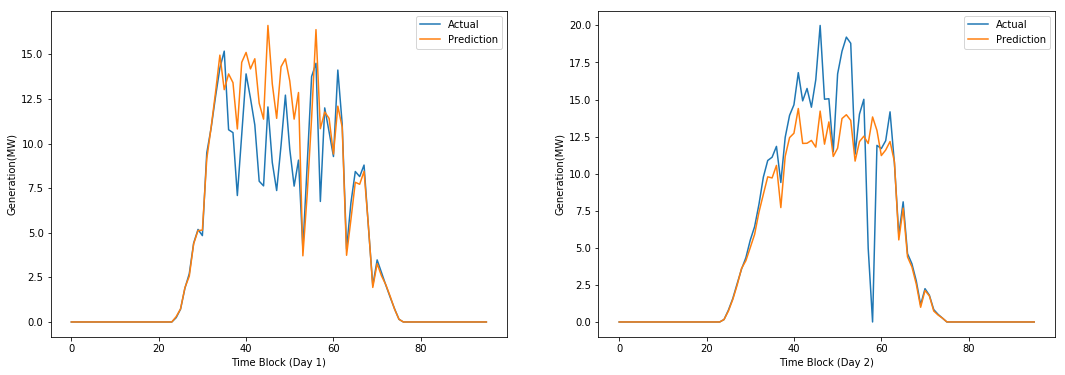

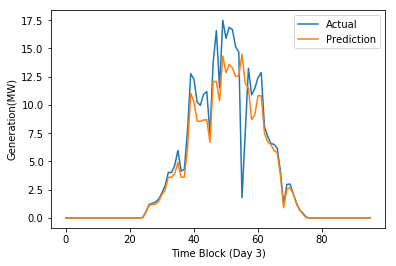

In [86]:

# For Plot 1
f = plt.figure(figsize=(18,6))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

# Day 1
ax1.plot(actual_vs_pred[['Actual(MW)','Prediction(MW)']][0:96].reset_index(drop=True))
ax2.plot(actual_vs_pred[['Actual(MW)','Prediction(MW)']][96:96*2].reset_index(drop=True))
ax1.set_xlabel('Time Block (Day 1)')
ax1.set_ylabel('Generation(MW)')
# Day 2
ax2.set_xlabel('Time Block (Day 2)')
ax2.set_ylabel('Generation(MW)')
ax1.legend(['Actual','Prediction'])
plt.legend(['Actual','Prediction'])
plt.show()
# Day 3 
plt.plot(actual_vs_pred[['Actual(MW)','Prediction(MW)']][96*2:96*3].reset_index(drop=True))
plt.xlabel('Time Block (Day 3)')
plt.ylabel('Generation(MW)')
plt.legend(['Actual','Prediction'])
plt.show() 


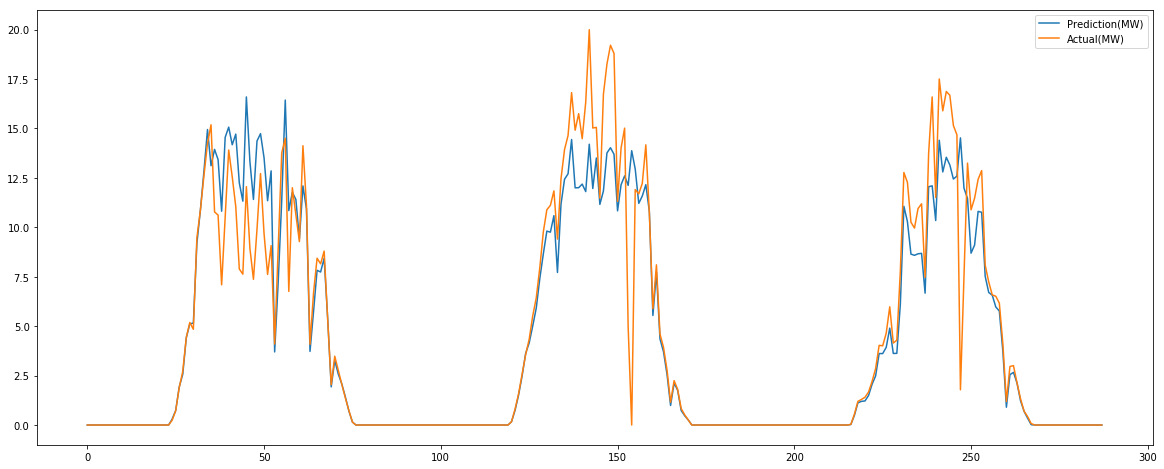

In [78]:
actual_vs_pred.plot(figsize = (20,8))

# Save the model

In [80]:


import joblib
 
# Save the model as a pickle in a file
joblib.dump(rf_model, 'Solar_forecast_model_final.pkl')

['Solar_forecast_model_final.pkl']